In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt                 # USED FOR DATA VISUALIZATION USING PYPLOTS. GRAPHS

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 55
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MINORPROJECT/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2968 files belonging to 3 classes.


## Found 2968 files belonging to 3 classes.

In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)            # This implies that the number of batching done i.e. len(dataset) * batch_size  =  total no of datasets

93

93*32 = 2976

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 2 1 1 0 0 1 1 2 2 2 2 1 2 0 2 2 1 1 0 1 2 0 0 0 1 1 2 1 0]


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[106. 102. 116.]
  [151. 147. 161.]
  [ 97.  93. 107.]
  ...
  [178. 180. 193.]
  [178. 180. 193.]
  [173. 175. 188.]]

 [[127. 123. 137.]
  [107. 103. 117.]
  [127. 123. 137.]
  ...
  [153. 155. 168.]
  [153. 155. 168.]
  [150. 152. 165.]]

 [[126. 122. 136.]
  [ 87.  83.  97.]
  [134. 130. 144.]
  ...
  [160. 162. 175.]
  [160. 162. 175.]
  [155. 157. 170.]]

 ...

 [[137. 135. 148.]
  [154. 152. 165.]
  [136. 134. 147.]
  ...
  [180. 182. 194.]
  [184. 186. 198.]
  [174. 176. 188.]]

 [[133. 131. 144.]
  [146. 144. 157.]
  [120. 118. 131.]
  ...
  [197. 199. 211.]
  [185. 187. 199.]
  [194. 196. 208.]]

 [[138. 136. 149.]
  [132. 130. 143.]
  [131. 129. 142.]
  ...
  [194. 196. 208.]
  [167. 169. 181.]
  [189. 191. 203.]]]


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


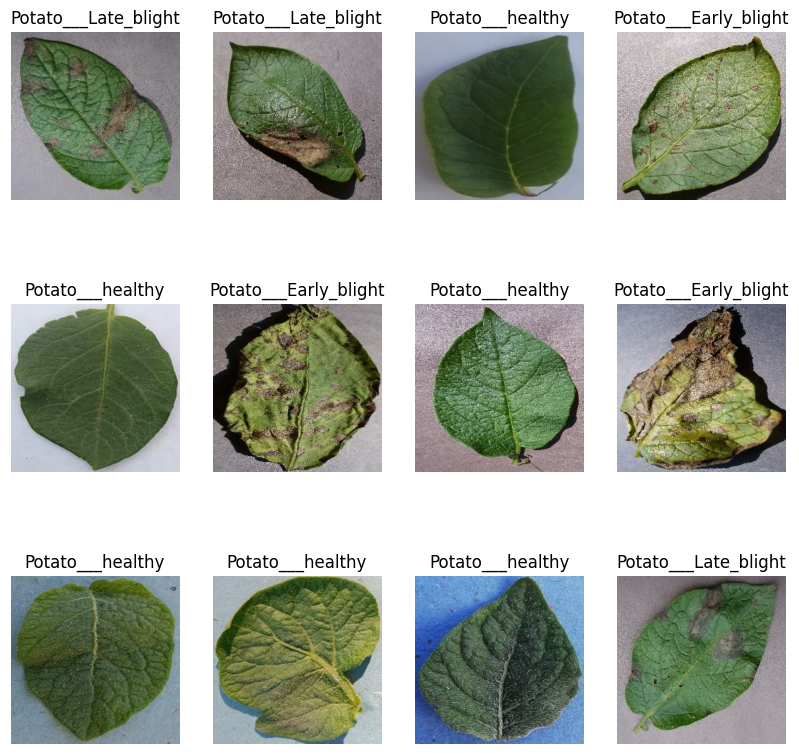

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [ ]:
len(dataset)            # Total number of batches

93

## 80% is our Training Data Set
## 20% is our again splitted into 2
### 10% is now Validation Set
### 10% is nor Testing Set

In [ ]:
train_size = 0.8
len(dataset)*train_size

74.4

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

39

In [ ]:
val_size = 0.1
len(dataset)*val_size

9.3

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

33

In [ ]:
def get_datset_partitions_tf(ds, train_split= 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)


    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_datset_partitions_tf(dataset)

In [ ]:
len(train_ds)

74

In [ ]:
len(test_ds)

10

In [ ]:
len(val_ds)

9

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)])

In [ ]:
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                     layers.experimental.preprocessing.RandomRotation(0.2),
                     ])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/55
74/74 [==============================] - 347s 139ms/step - loss: 0.7685 - accuracy: 0.6191 - val_loss: 0.4445 - val_accuracy: 0.8090
Epoch 2/55
74/74 [==============================] - 5s 63ms/step - loss: 0.4505 - accuracy: 0.8106 - val_loss: 0.4230 - val_accuracy: 0.8056
Epoch 3/55
74/74 [==============================] - 5s 63ms/step - loss: 0.2282 - accuracy: 0.9110 - val_loss: 0.3753 - val_accuracy: 0.8750
Epoch 4/55
74/74 [==============================] - 4s 60ms/step - loss: 0.2213 - accuracy: 0.9081 - val_loss: 0.1514 - val_accuracy: 0.9410
Epoch 5/55
74/74 [==============================] - 5s 62ms/step - loss: 0.1085 - accuracy: 0.9606 - val_loss: 0.1887 - val_accuracy: 0.9306
Epoch 6/55
74/74 [==============================] - 4s 61ms/step - loss: 0.0945 - accuracy: 0.9576 - val_loss: 0.0974 - val_accuracy: 0.9722
Epoch 7/55
74/74 [==============================] - 5s 61ms/step - loss: 0.0732 - accuracy: 0.9708 - val_loss: 0.0544 - val_accuracy: 0.9792
Epoch 8/55

In [ ]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 4s 28ms/step - loss: 0.0370 - accuracy: 0.9937


In [ ]:
scores

[0.0370352640748024, 0.9937499761581421]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 55, 'steps': 74}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.6190677881240845,
 0.8105932474136353,
 0.9110169410705566,
 0.9080508351325989,
 0.9605932235717773,
 0.9576271176338196,
 0.9707627296447754,
 0.9711864590644836,
 0.9817796349525452,
 0.9834745526313782,
 0.9788135886192322,
 0.9762712121009827,
 0.9822033643722534,
 0.9877118468284607,
 0.9906779527664185,
 0.9885593056678772,
 0.9809321761131287,
 0.9838982820510864,
 0.9847457408905029,
 0.993220329284668,
 0.9957627058029175,
 0.9923728704452515,
 0.9919491410255432,
 0.9877118468284607,
 0.9957627058029175,
 0.993220329284668,
 0.9974576234817505,
 0.9957627058029175,
 0.996610164642334,
 0.9864406585693359,
 0.9809321761131287,
 0.9936440587043762,
 0.9953389763832092,
 0.9843220114707947,
 0.9826270937919617,
 0.9906779527664185,
 0.9843220114707947,
 0.9809321761131287,
 0.9961864352226257,
 0.9961864352226257,
 0.9911016821861267,
 0.9927965998649597,
 0.9995762705802917,
 0.9995762705802917,
 0.9944915175437927,
 0.9953389763832092,
 0.993220329284668,
 0.98601692914962

In [ ]:
len(history.history['accuracy'])

55

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

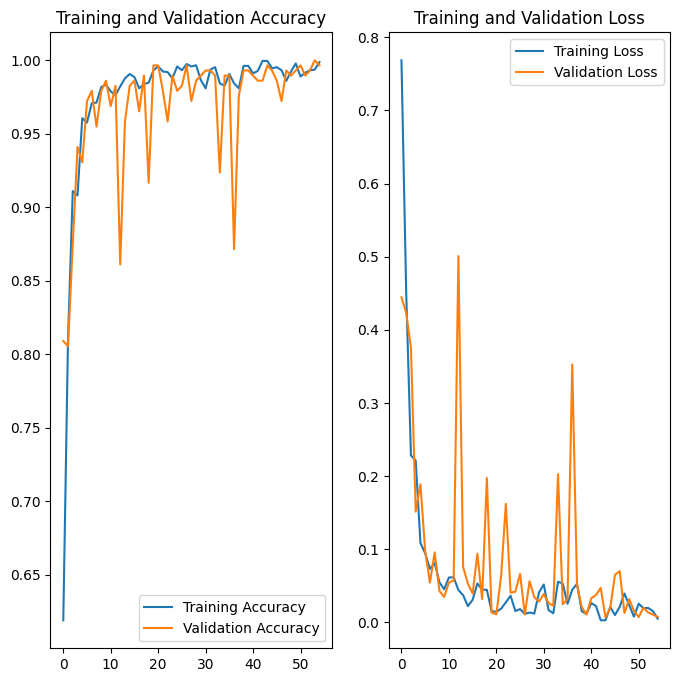

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy())

[[[194. 188. 192.]
  [185. 179. 183.]
  [179. 173. 177.]
  ...
  [152. 143. 148.]
  [144. 135. 140.]
  [136. 127. 132.]]

 [[196. 190. 194.]
  [187. 181. 185.]
  [181. 175. 179.]
  ...
  [155. 146. 151.]
  [149. 140. 145.]
  [154. 145. 150.]]

 [[192. 186. 190.]
  [184. 178. 182.]
  [178. 172. 176.]
  ...
  [152. 141. 145.]
  [156. 145. 149.]
  [125. 114. 118.]]

 ...

 [[157. 151. 153.]
  [159. 153. 155.]
  [162. 156. 158.]
  ...
  [119. 110. 113.]
  [123. 114. 117.]
  [123. 114. 117.]]

 [[164. 158. 160.]
  [165. 159. 161.]
  [165. 159. 161.]
  ...
  [121. 112. 115.]
  [121. 112. 115.]
  [115. 106. 109.]]

 [[167. 161. 163.]
  [165. 159. 161.]
  [162. 156. 158.]
  ...
  [122. 113. 116.]
  [114. 105. 108.]
  [117. 108. 111.]]]


In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy().astype('uint8'))


[[[194 188 192]
  [185 179 183]
  [179 173 177]
  ...
  [152 143 148]
  [144 135 140]
  [136 127 132]]

 [[196 190 194]
  [187 181 185]
  [181 175 179]
  ...
  [155 146 151]
  [149 140 145]
  [154 145 150]]

 [[192 186 190]
  [184 178 182]
  [178 172 176]
  ...
  [152 141 145]
  [156 145 149]
  [125 114 118]]

 ...

 [[157 151 153]
  [159 153 155]
  [162 156 158]
  ...
  [119 110 113]
  [123 114 117]
  [123 114 117]]

 [[164 158 160]
  [165 159 161]
  [165 159 161]
  ...
  [121 112 115]
  [121 112 115]
  [115 106 109]]

 [[167 161 163]
  [165 159 161]
  [162 156 158]
  ...
  [122 113 116]
  [114 105 108]
  [117 108 111]]]


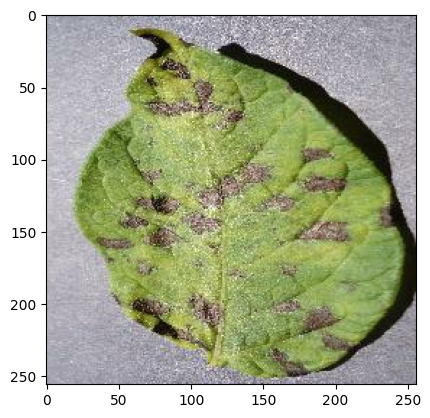

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

First image to predict
Actual label:  Potato___healthy
1/1 [==============================] - 0s 148ms/step
Predicted Label:  Potato___healthy


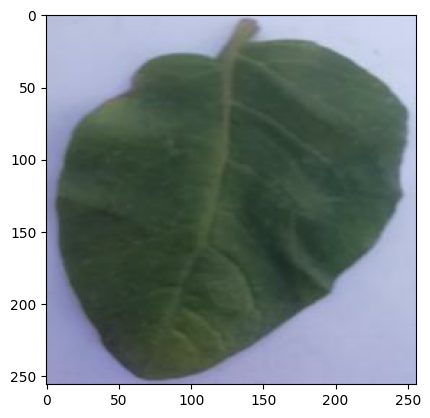

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label: ", class_names[first_label])


    batch_prediction = model.predict(images_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)    #Create a Batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


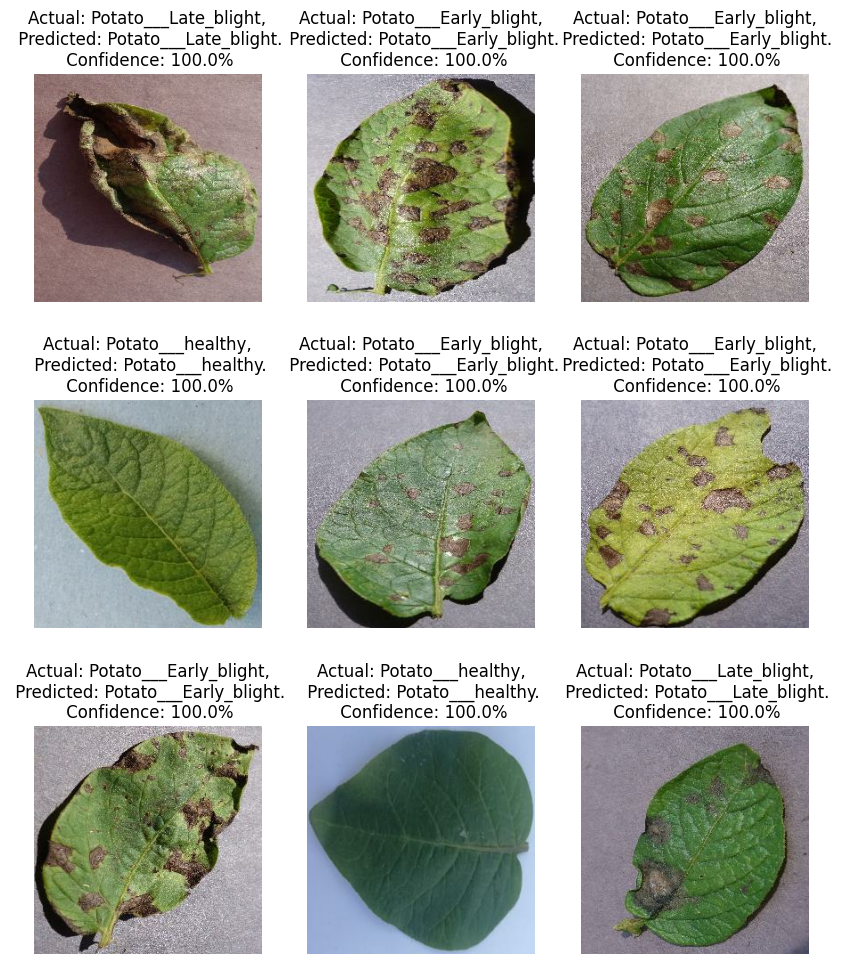

In [ ]:
plt.figure(figsize=(10,12))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")